**About dataset**

Dataset yang digunakan untuk analisis dan klasifikasi berasal dari Kaggle dan berjudul "Data Brainwave EEG Siswa yang Bingung". File khusus yang digunakan untuk tujuan ini adalah EEG_data.csv. Untuk melihat deskripsi tentang dataset tersebut, Anda dapat mengikuti tautan ini: https://www.kaggle.com/datasets/wanghaohan/confused-eeg.



# Data Exploration

## Import the required dataset


In [1]:
import numpy as np
#import pustaka numpy untuk melakukan operasi numerik

import pandas as pd
#import untuk melakukan manipulasi dan analisis data

import seaborn as sns
#import untuk menvisualisasikan data secara statistik menggunakan grafik dan plot yang menarik dan informatif

from matplotlib import pyplot as plt
#import untuk membuat berbagai jenis plot dan grafik untuk menvisualisasikan data

from sklearn.model_selection import train_test_split
#train_test_split digunakan untuk membagi data menjadi data latih dan data uji untuk keperluan machine learning

import tensorflow.compat.v1 as tf
#untuk import membangun dan melatih model machine learning

from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
#mengambil beberapa lapisan layers dari tensorflow
#dense,membuat lapisan fully connected dalam sebuah neural network
#activation, untuk aktivasi yang diterapkan pada keluaran dari lapisan sebelumnya
#flatten, untuk mengubah tensor multidimensi menjadi tensor 1D
#Dropout, untuk menerapkan dropout regularization pada neural network
#LSTM (Long Short-Term Memory), tipe khusus dari lapisan jaringan saraf rekurrent yang dirancang untuk menangani masalah yang melibatkan urutan data
#Bidirectional, untuk membuat lapisan jaringan rekurrent menjadi dua arah
#BatchNormalization, untuk normalisasi data dalam lapisan selama pelatihan
#PReLU(Parametric Rectified Linier Unit), Untuk memperkenalkan parameter yang dapat diatur selain dari nol untuk mengatasi masalah dying ReLU
#ReLU (Rectified Linier Unit), untuk aktivasi sederhana, mengganti nilai negatif menjadi nol dan mempertahankan nilai positif ( mengatasi masalah vanishing gradient)
#Reshape, untuk mengubah bentuk (shape) tensor menjadi bentuk yang diinginkan

from tensorflow.keras.models import load_model
#load_model berfungsi memuat model yang telah disimpan sebelumnya dalam format HDF5 atau Format savedModel TensorFlow

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#EarlyStopping, untuk menghentikan pelatihan dini berdasarkan kondisi tertentu
#ModelCheckpoint, memungkinkan menyimpan model pada titik titik tertentu selama pelatihan

from tensorflow import keras
#Keras,modul sub model dari tensorflow, fungsi API pembangunan model tingkat tinggi dalam TensorFlow

In [2]:
df = pd.read_csv("EEG_data 1.csv")
df

#pemanggilan data melalui url menggunakan pd yaitu pandas
#encoding UTF-8, intinya tuh biar data yang di import menyesuaikan oleh python.

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,1.0,0.0


## Manipulate the dataset
Setiap percobaan dalam dataset ini memiliki titik waktu (timepoints), tetapi karena informasi mengenai titik waktu tidak tersedia dalam data yang diimpor.

jadi datasetnya ga ada waktu kapan direkam

In [3]:
df = df.rename(columns={"user-definedlabeln": "userlabel"})
#intinya rename, mengubah nama user-definedlabeln jadi userlabel

In [4]:
df_new = df.reset_index().drop(df.index)
#reset_index(), untuk mereset indeks dari dataframe
#drop, argumen opsional dalam fungsi reset_index

for i in range(0,10):
  for j in range(0,10):
    query = "SubjectID == "+str(i)+" & VideoID == "+str(j)
#untuk memiih data dari df, berdasarkan nilai i dan J pada setiap iterasi perulagnan

    df_temp = df.query(query)
    df_temp = df_temp.reset_index(drop=True)
    df_temp = df_temp.reset_index()
    # print(df_temp)

    df_new = pd.concat([df_new, df_temp])
    #menggabungkan df_new dengan df_temp secara berurutan

#intinya tuh menggabungkan dan mengurutkan ulang berdasarkan kriteria SubjectID dan VideoID
#i merujuk pada SubjectID
#j merujuk pada VideoID


df_new = df_new.rename(columns={"index": "timepoint"})
#mengganti nama kolom index menjadi timepoint

df_new = df_new.reset_index(drop=True)
#mereset ulang indeks dataframe df_new
#drop=True, agar indeks lama diabaikan setelah direset

df_new.head()
#menampilkan 5 baris pertama dari df_new

,timepoint,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,userlabel
0,0,0.0,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,0.0
1,1,0.0,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
2,2,0.0,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,0.0
3,3,0.0,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,0.0
4,4,0.0,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,0.0


## Observe characteristics (confused / not confused) by group of frequencies

### Find out correlations between each feature
Untuk mengidentifikasi kandidat fitur yang kuat, kita akan menerapkan matriks korelasi pada dataset.

Berdasarkan plot di bawah ini, terlihat bahwa hubungan antara setiap fitur lemah. Namun, penting untuk dicatat bahwa VideoID menunjukkan korelasi yang relatif kuat dengan label. Meskipun demikian, karena VideoID tidak dimaksudkan untuk dianggap sebagai fitur, kita akan mengabaikan observasi ini. Selain itu, kita mengamati bahwa korelasi antara label dan fitur lainnya juga lemah.




<Axes: >

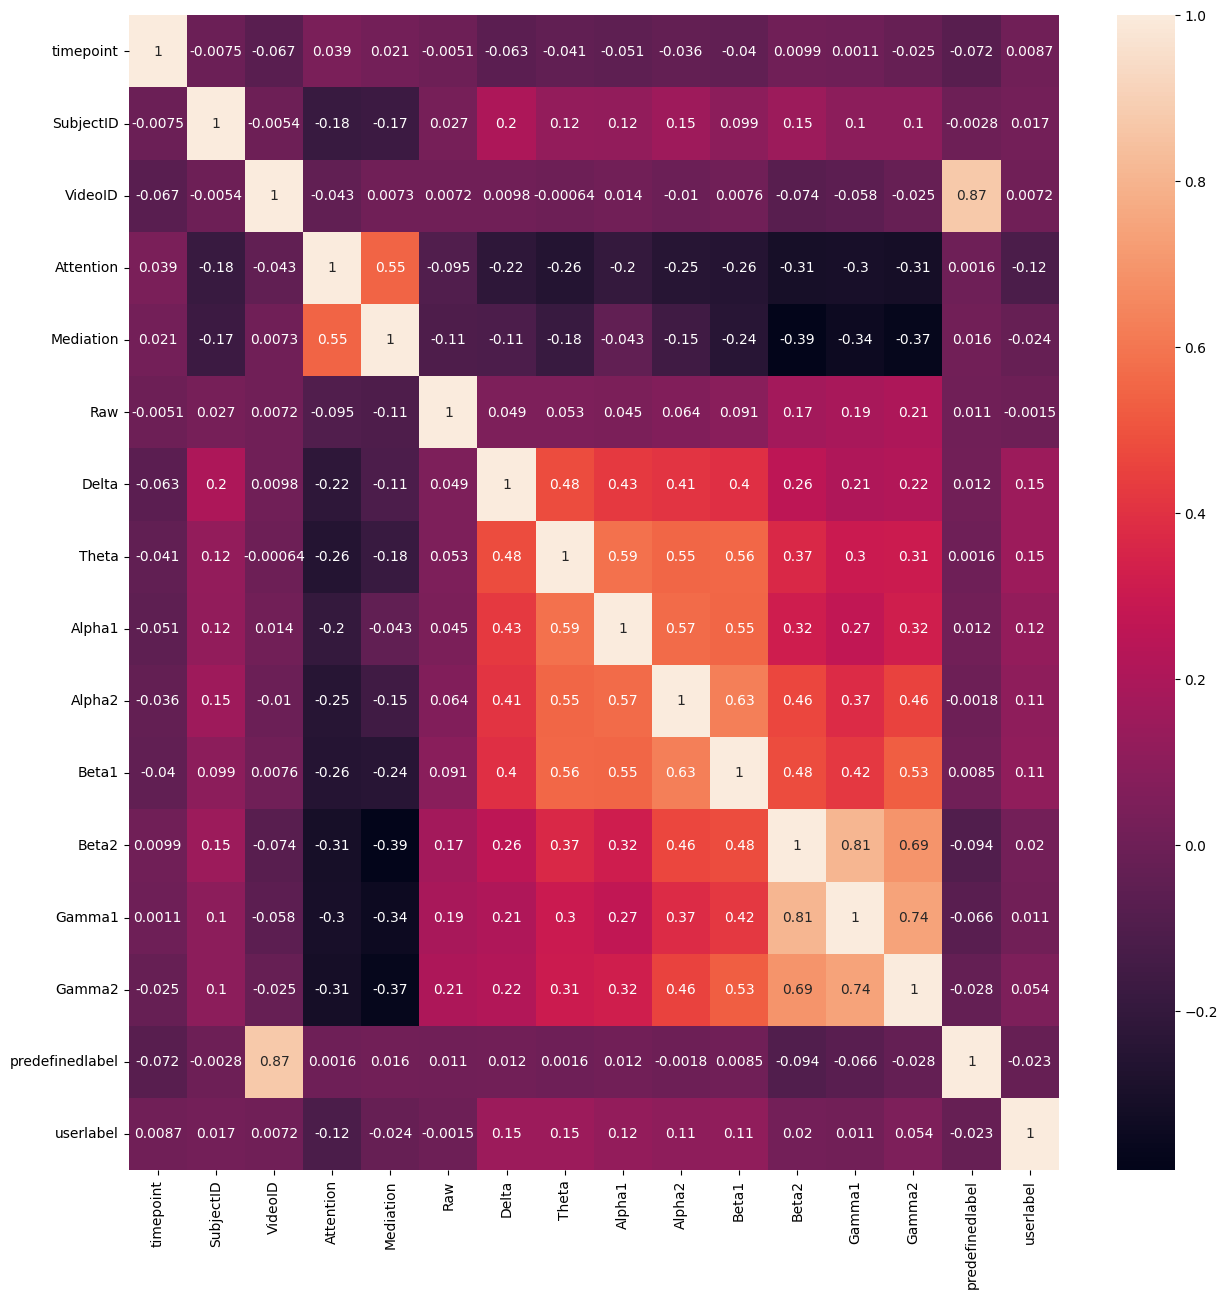

In [5]:
#intinya disini membuat heatmap buat biar tau keterhubungan tiap label nya

plt.figure(figsize = (15,15))
#membuat figure ukuran 15x15 inch
#figure(), untk mengatur ukuran dan konfigurasi plot

cor_matrix = df_new.corr()
#corr(),untuk menghitung korelasi antar kolom-kolom dalam dataframe

sns.heatmap(cor_matrix,annot=True)
#heatmap, untuk membuat visualisasi berdasarkan cor_matrix
#annot=True, untuk menampilkan nilai korelasi di dalam matrix persegi panas



### Compare the labels by averaging the signals grouped according to their respective labels.
Langkah selanjutnya, kita bertujuan untuk membandingkan titik waktu (timepoints) dari sinyal-sinyal yang mengalami kebingungan (confused) dengan yang tidak mengalami kebingungan. Untuk mencapai ini, kita akan mengelompokkan sinyal-sinyal tersebut ke dalam tiga kategori berdasarkan metode pelabelan: dilabeli oleh penulis, dilabeli oleh subjek, dan dilabeli oleh penulis dan subjek bersama-sama. Setelah sinyal-sinyal tersebut dikelompokkan berdasarkan labelnya, kita akan menghitung rata-rata untuk setiap titik waktu.


In [6]:
def draw_multiple_figures(df_confused,df_understand):
#draw multiple_figures, untuk menggambar beberapa subplot yang berisi garis garis (line plot) untuk kolom kolom tertentu dari dua DataFrame yang diberikan
#dataframe (df_confused dan df_understand)

  sns.set(rc={'figure.figsize':(30,8.27)})
#mengatur ukuran gambar secara keseluruhan
#set, mengatur parameter "figure.figsize" yang mengatur ukuran gambar
#rc, resource configurations, istilahnya agar kita bisa ngatur lebih leluasa
#mengatur gambar dengan 30 inch lebar x 8,27 inch tinggi

  fig, axs = plt.subplots(5, 2)
#membuat gambar (figure) yang berisi 5 baris dan 2 kolom subplot
#subplots, untuk membuat subplot untuk menggambar line plot

  sns.lineplot(data=df_confused, x="timepoint", y="Attention",errorbar=None, ax=axs[0,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Attention",errorbar=None, ax=axs[0,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Mediation",errorbar=None, ax=axs[0,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Mediation",errorbar=None, ax=axs[0,1])

  sns.lineplot(data=df_confused, x="timepoint", y="Alpha1",errorbar=None, ax=axs[1,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Alpha1",errorbar=None, ax=axs[1,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Alpha2",errorbar=None, ax=axs[1,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Alpha2",errorbar=None, ax=axs[1,1])

  sns.lineplot(data=df_confused, x="timepoint", y="Beta1",errorbar=None, ax=axs[2,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Beta1",errorbar=None, ax=axs[2,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Beta2",errorbar=None, ax=axs[2,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Beta2",errorbar=None, ax=axs[2,1])

  sns.lineplot(data=df_confused, x="timepoint", y="Gamma1",errorbar=None, ax=axs[3,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Gamma1",errorbar=None, ax=axs[3,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Gamma2",errorbar=None, ax=axs[3,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Gamma2",errorbar=None, ax=axs[3,1])

  sns.lineplot(data=df_confused, x="timepoint", y="Delta",errorbar=None, ax=axs[4,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Delta",errorbar=None, ax=axs[4,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Theta",errorbar=None, ax=axs[4,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Theta",errorbar=None, ax=axs[4,1])
#inti dari code diatas
#sns lineplot ada dua tiap baris lalu spasi artinya, setiap baris berisi dua line plot
#sns.lineplot(), untuk membuat line plot berdasarkan data dari DataFrame yang sesuai
#data, Dataframe yang digunakan untuk menggambar line plot
#x, nama kolom yang digunakan disini x dimaksud waktu
#y, nama kolom yang digunakan disini y dimaksud nilai
#errorbar=None, tidak menampilkan error bar pada plot
#ax=axs[i, j], menentukan subplot yang akan digunakan unutk menggambar line plot

  fig.legend(labels=['confused','not confused'], loc="lower center", ncol=2)
  fig.suptitle("Confused vs Not Confused by Groups of Frequency")
#legend, untuk menambahkan nama pada tabel nya  dengan nama confused, dan not confused
#loc, dengan lokasi lower enter dan 2 kolom atau ncol=2

#suptitle, untuk menambahkan judul utama pada gambar

  plt.show()
#untuk menampilkan gambar dengan semua sublot dan elemen lainnya

### Comparison between Confused vs Not Confused in dataset labeled by the author.

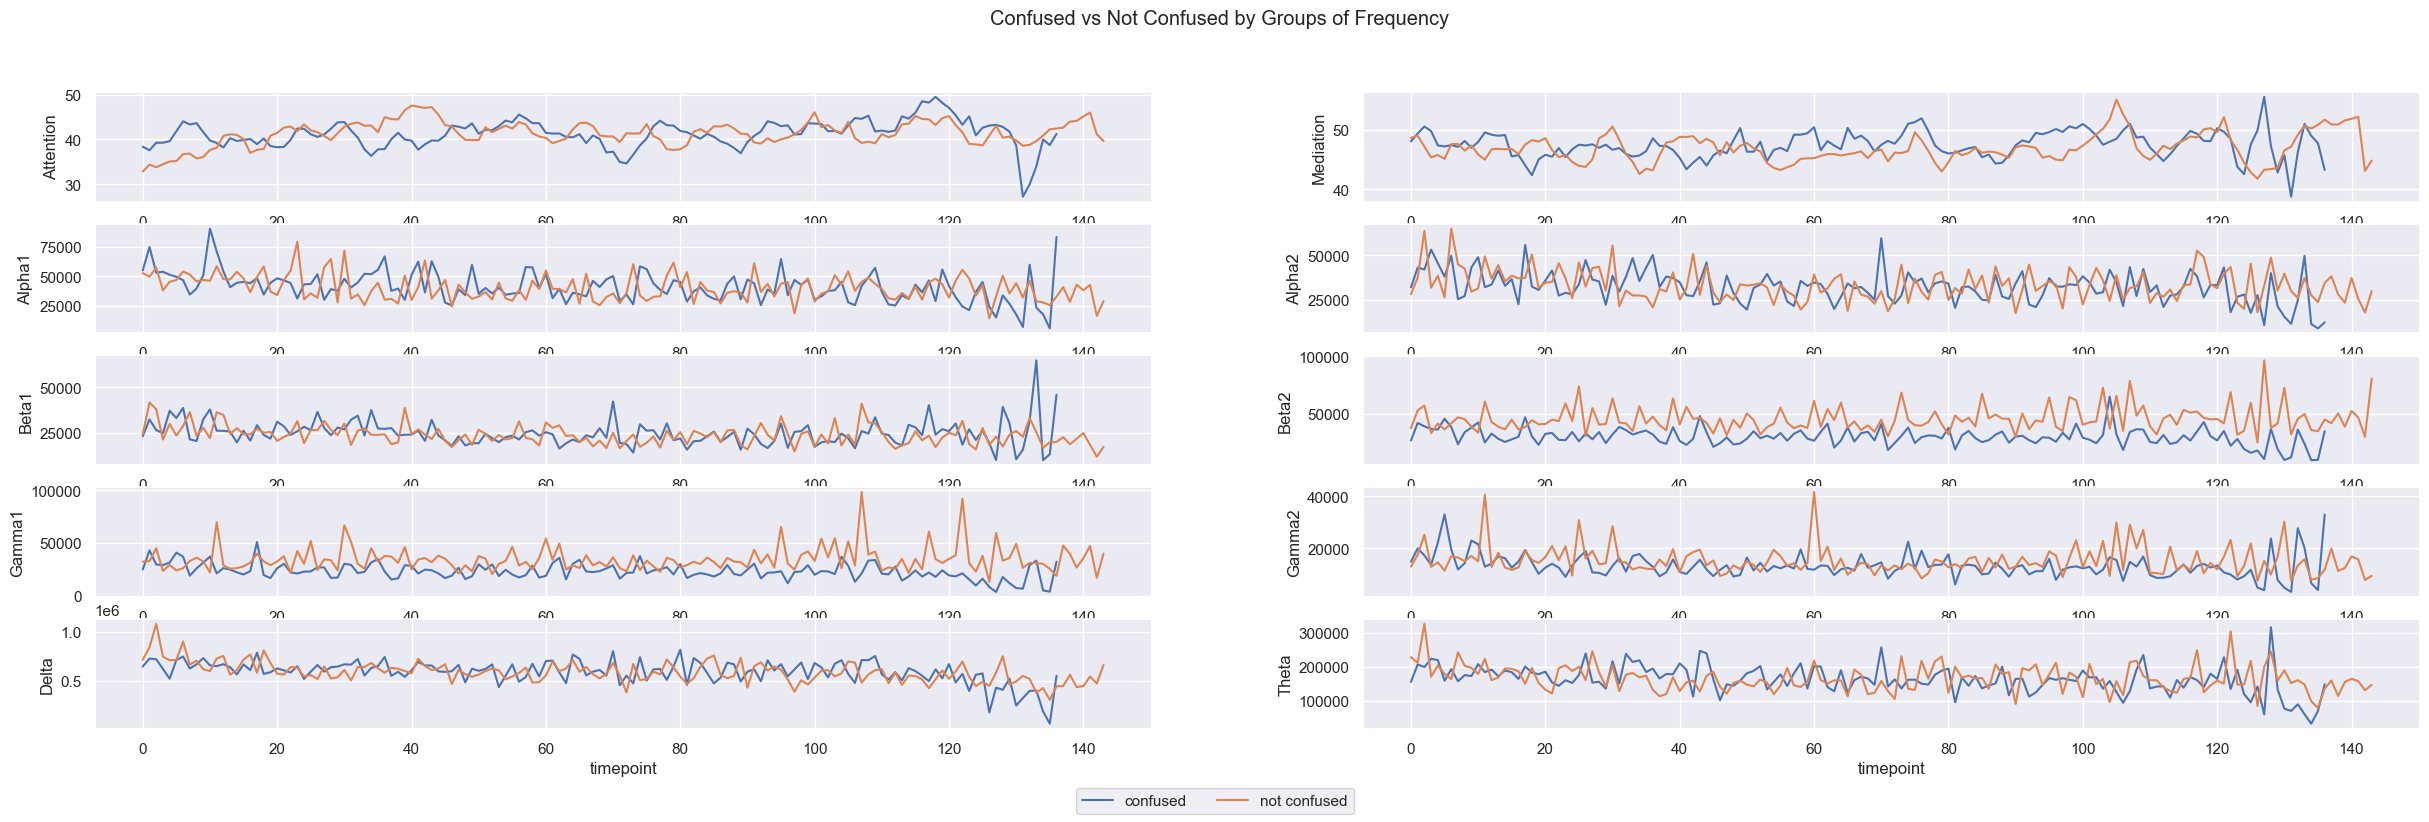

In [7]:
query = "predefinedlabel == 1"
df_confused = df_new.query(query)
#query, memfilter data dari Dataframe berdasarkan nilai kolom predefinedlabel yang sama dengan 1
#df_confused, untuk menyimpan query tadi di dalam variabel df_confused

query = "predefinedlabel == 0"
df_understand = df_new.query(query)
#qeury, memfilter data dari Dataframe dengan nilai predefinellabel yang sebesar nol
#df_understand, menyimpan nilai query tadi di dalam variabel df_understand

draw_multiple_figures(df_confused,df_understand)
#draw_multiple_figures, untuk menggambar beberapa subplot dgn line plot untuk kolom kolom tertenu
#dari kedua dataframe untuk membandingkan perubahan nilai dari waktu ke waktu

### Comparison between Confused vs Not Confused in dataset labeled by subjects.

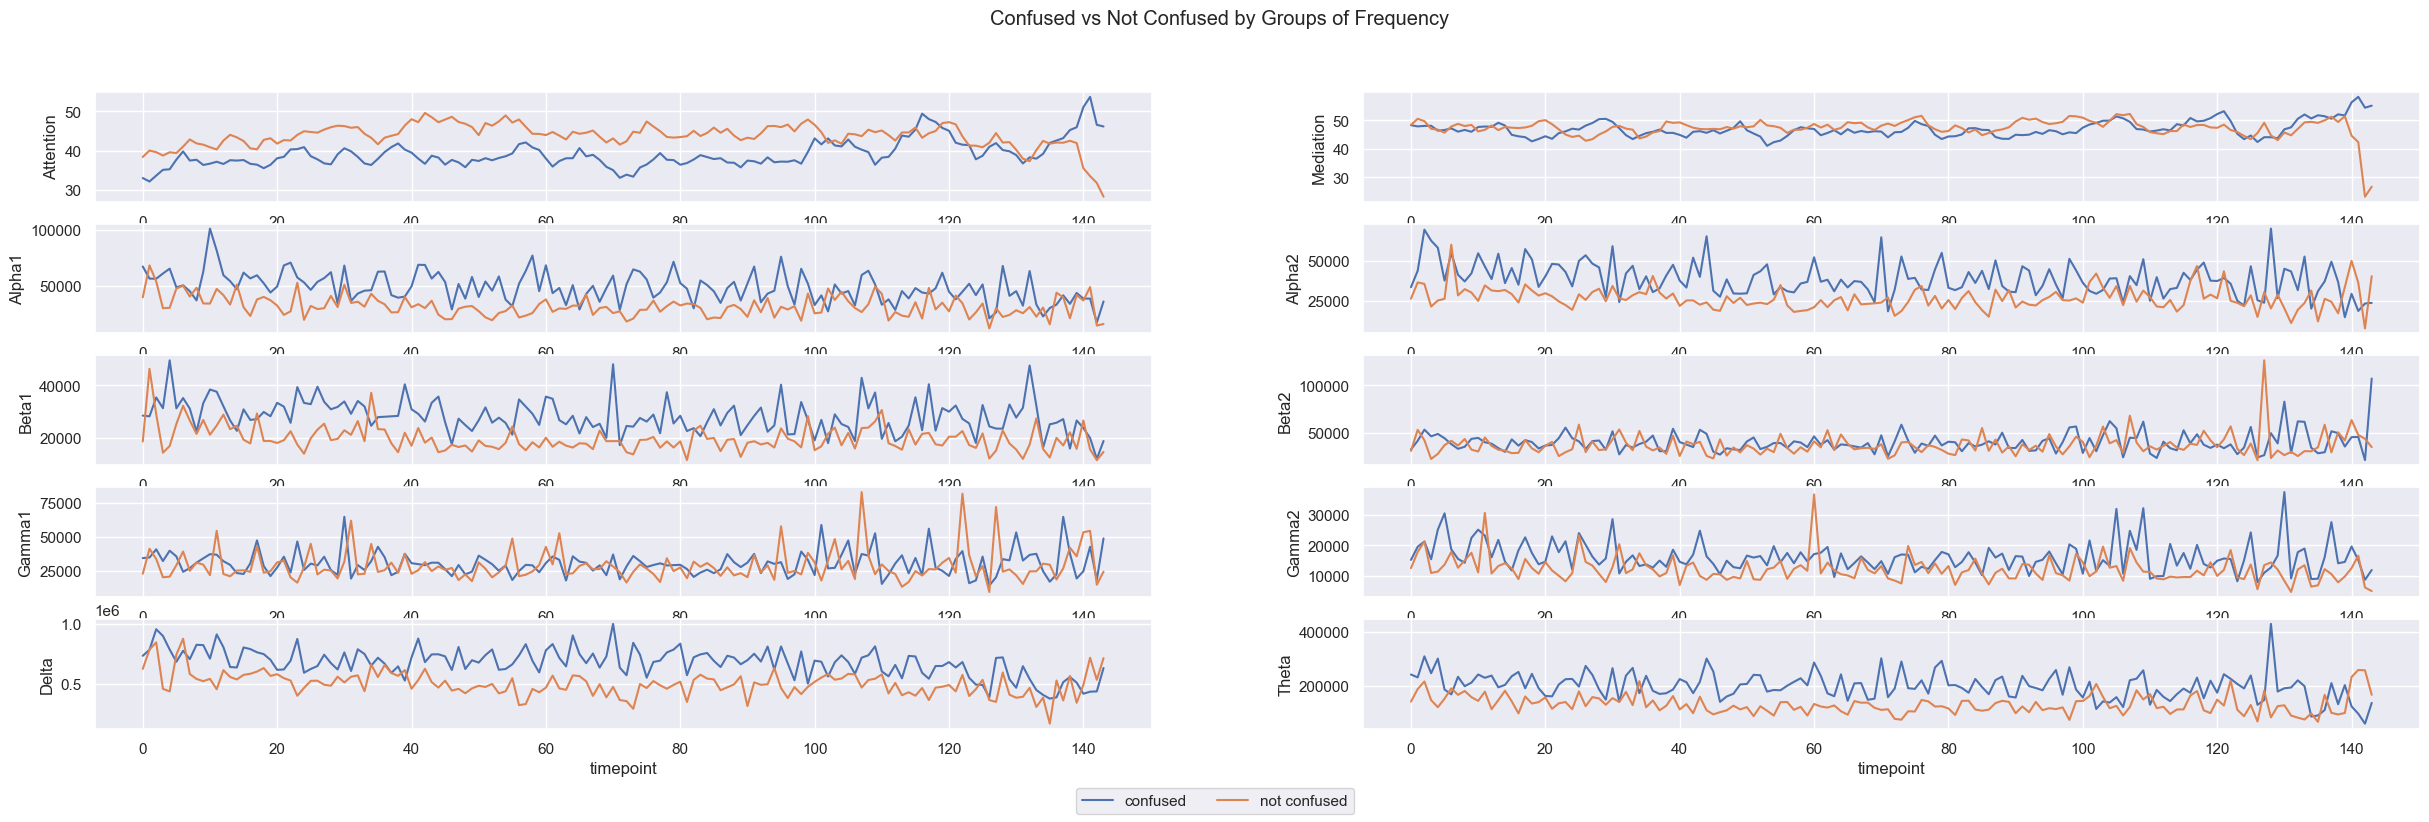

In [8]:
query = "userlabel == 1"
df_confused = df_new.query(query)

query = "userlabel == 0"
df_understand = df_new.query(query)

draw_multiple_figures(df_confused,df_understand)
#draw_multiple_figures, untuk menggambar beberapa subplot dgn line plot untuk kolom kolom tertenu
#dari kedua dataframe untuk membandingkan perubahan nilai dari waktu ke waktu

### Comparison between Confused vs Not Confused in dataset same-labeled by the author and subjects.

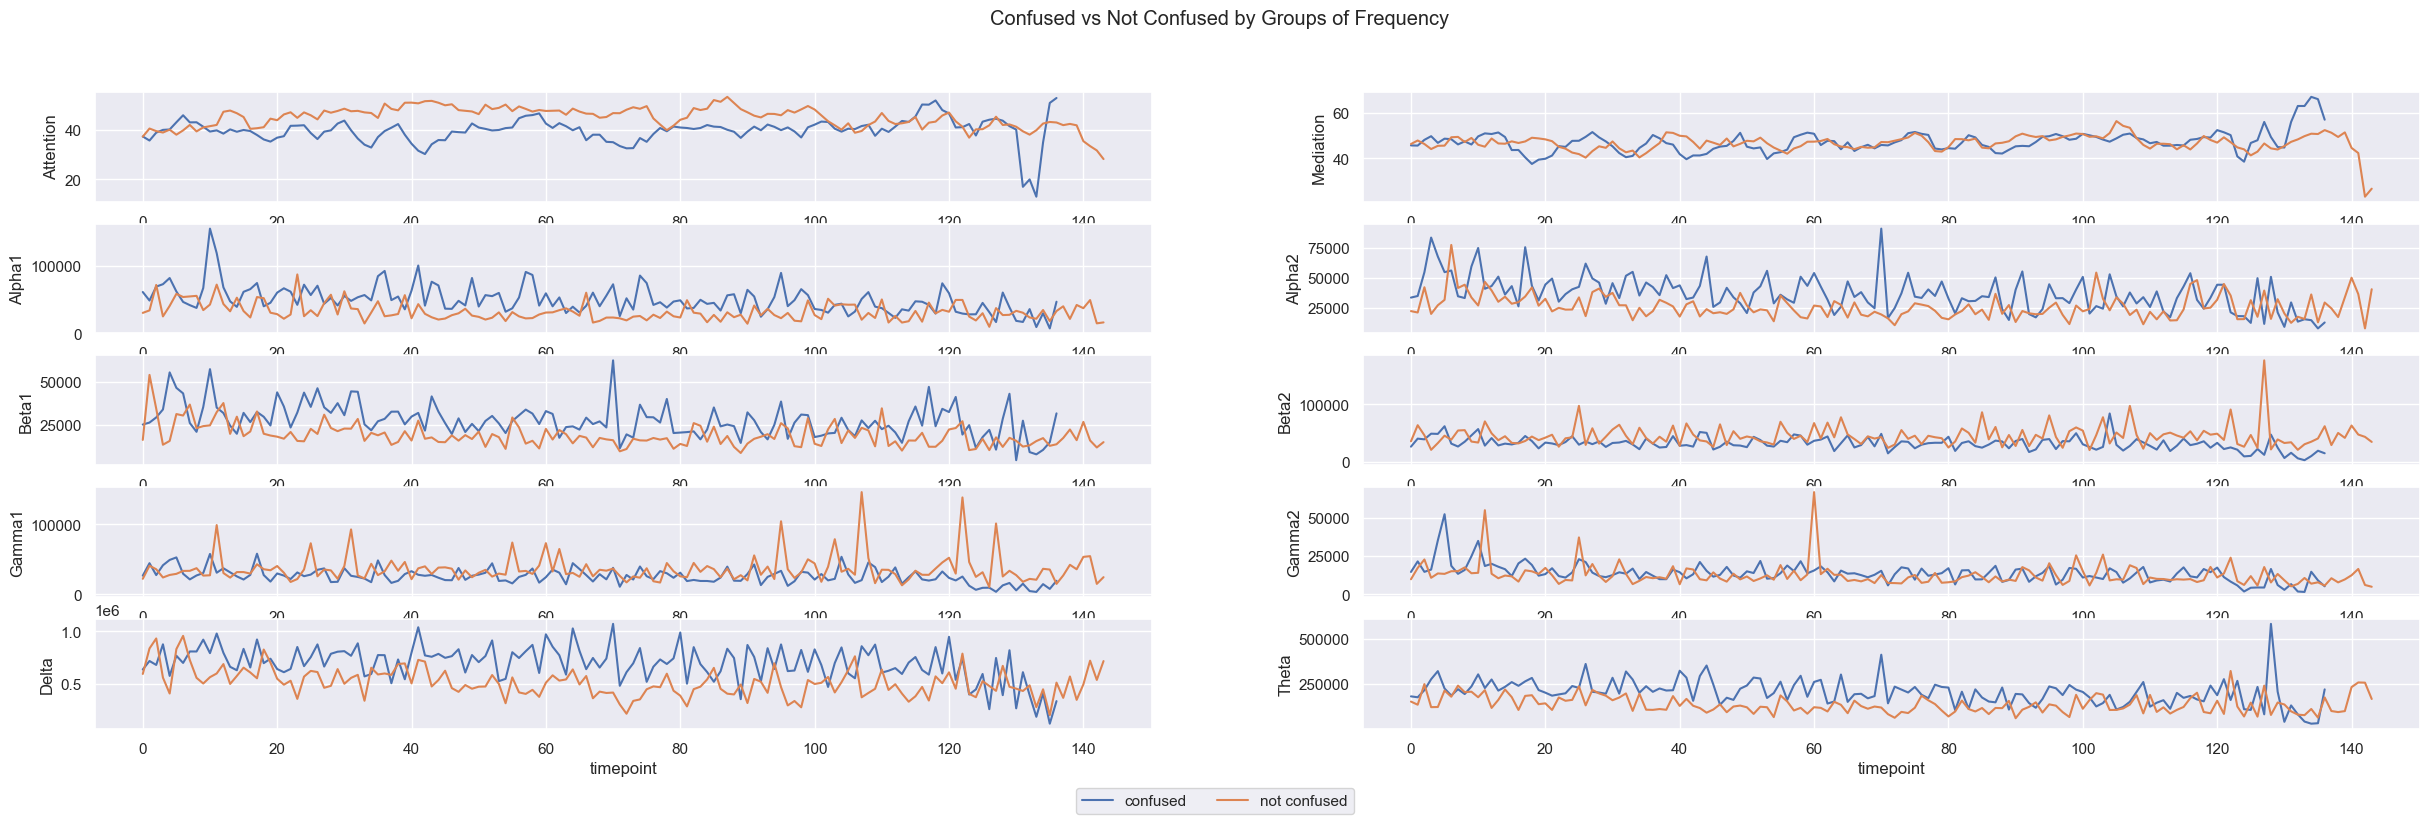

In [9]:
query = "predefinedlabel == 1 & userlabel == 1"
df_confused = df_new.query(query)

query = "predefinedlabel == 0 & userlabel == 0"
df_understand = df_new.query(query)

draw_multiple_figures(df_confused,df_understand)
#draw_multiple_figures, untuk menggambar beberapa subplot dgn line plot untuk kolom kolom tertenu
#dari kedua dataframe untuk membandingkan perubahan nilai dari waktu ke waktu


Dengan melakukan plotting sinyal-sinyal berdasarkan frekuensi masing-masing dan mengkategorikan label menggunakan kriteria yang sama, yaitu dilabeli oleh penulis dan subjek bersama-sama, kita dapat mengamati bahwa label-label tersebut dapat dengan mudah dibedakan dari plot Beta1, Delta, dan Gamma.



# Data Training and Classification

## Training dataset preparation, using only data same-labeled by the author and subjects



In [10]:
df_true = df_new.query("(predefinedlabel == 0 & userlabel == 0) | (predefinedlabel == 1 & userlabel == 1)")
#df_new, dataframe asli yang berisih seluruh data
#df_true, dataframe baru yang dihasilkan dari data asli, yang berisi baris yang memenuhi salah satu dari dua kondiri


X = df_true[['Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']]
#X, itu memilih fitur fitur apa saja yang akan di ambil untuk pemodelan, disini ada delta, theta dan lain lain

print(X.isna().sum())
print(X.shape)
#.isna().sum(), untuk ngelihat berapa banyak nilai NaN dalam setiap kolom
#NaN itu missing values

Y = df_true.predefinedlabel
print(Y.shape)
#Y.shape, artinya kita bisa melihat jumlah elemen dalam series Y yang seharusnya sama dengan jumlah baris dalam DataFrame X


Delta     0
Theta     0
Alpha1    0
Alpha2    0
Beta1     0
Beta2     0
Gamma1    0
Gamma2    0
dtype: int64
(6253, 8)
(6253,)


In [11]:
print(df_true[df_true['predefinedlabel'] == 1].shape)
#buat nyari ukuran dataframe di df_true berdasarkan nilai predefinedlabel yang sama = 1

print(df_true[df_true['predefinedlabel'] == 0].shape)
#buat nyari ukuran dataframe di df_true berdasarkan nilai predefinedlabel yang sama = 0

print(df_true.shape)
#nyari ukuran dataframe tanpa ada penyaringan, bisa dikatakan nilai total.

(3079, 16)
(3174, 16)
(6253, 16)


## Classification using XGBoost

### Run the classification

In [12]:
def classify(X,Y):
  import xgboost
  random_state = 42
#bikin def (fungsi) classify
#import xgboost buat klasifikasi
#random state, untuk mengontrol pemilihan bilangan acak dalam beberapa bagian dari kode
# kenapa 42? ini sebenernya udah umum, karena dianggap angka acak yang baik

  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,
                                  random_state=random_state, stratify=Y)
#intinya tuh membagi data menjadi data train (pelatihan) dan data test (uji)
#X, data yang berisi fitur fitur yang akan digunakan sebagai variabel bebas atau input dalam model
#Y, target data yang berisi label atau kelas yang akan diprediksi oleh model
#test_sixe=0,2, artinya 20% data digunakan data uji, 80% menjadi data pelatihan
#random state, membantu dalam mereporudksi hasil secara konsisten
#stratify,untuk menjaga proporsi kelas yang seimbang dalam data uji dan data pelaithan.

  model = xgboost.XGBClassifier(base_score=0.5, learning_rate=0.1,max_depth=6,
          objective='binary:logistic', eta=0.01)
  model.fit(x_train, y_train)
#intinya tuh, membuat objek model klasifikasi pakai XGBClassifier dan ngelatih model tersebut
#base_score=0,5, nilai skor baseline (nilai tebakan awal) sebelum memulai pelatihan, angka 0,5 emang default
#learning_rate=0,1, mengatur seberapa besar perbaikan yang dibuat pada setiap langkah dalam pelatihan
#kek, kalau nilai nya rendah cenderung stabil tapi butuh banyak iterasi bair performa nya optimal
#max_depth=6, parameter yang mengatur kedalaman maksimum dari setiap pohon keputusan dalam model
#kalau nilai nya semakin tinggi semakin kompleks model tapi berisiko overfitting jika tidak tepat
#objective="binary:logistic",menandakan model digunakan untuk masalah klasifikasi biner (dua kelas), dgn output probailitas logistik
#eta=0.01, parameter analog dari learning rate tetap digunakan untuk mendukung kompabilitas dengan kode lama

  y_pred = model.predict(x_test)
  predictions = [round(value) for value in y_pred]

  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))

  ## draw the tree
  from xgboost import plot_tree
  from matplotlib.pylab import rcParams

  rcParams['figure.figsize'] = 80,50

  plot_tree(model)
  plt.show()

  ## show the cross validation result
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import cross_val_score

  kfold = StratifiedKFold(n_splits=5)
  results = cross_val_score(model, X, Y, cv=kfold)
  print("Cross Validation Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
  print("")
  print("---------------------------------------------------------------------")
  print("")

  ## print feature importance
  print("Feature Importance")
  rcParams['figure.figsize'] = 5,5
  from xgboost import plot_importance
  plot_importance(model)
  plt.show()

  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_test, y_pred)
  # Hitung confusion matrix

  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.show()
  # Tampilkan confusion matrix dalam bentuk heatmap

  from sklearn.metrics import mean_squared_error, mean_absolute_error
  y_pred = model.predict(x_test)

  # Menghitung MSE
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error (MSE):", mse)

  # Menghitung MAE
  mae = mean_absolute_error(y_test, y_pred)
  print("Mean Absolute Error (MAE):", mae)

  # Menghitung RMSE
  rmse = np.sqrt(mse)
  print("Mean Squared Error (RMSE):", rmse)

Accuracy: 66.43%


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

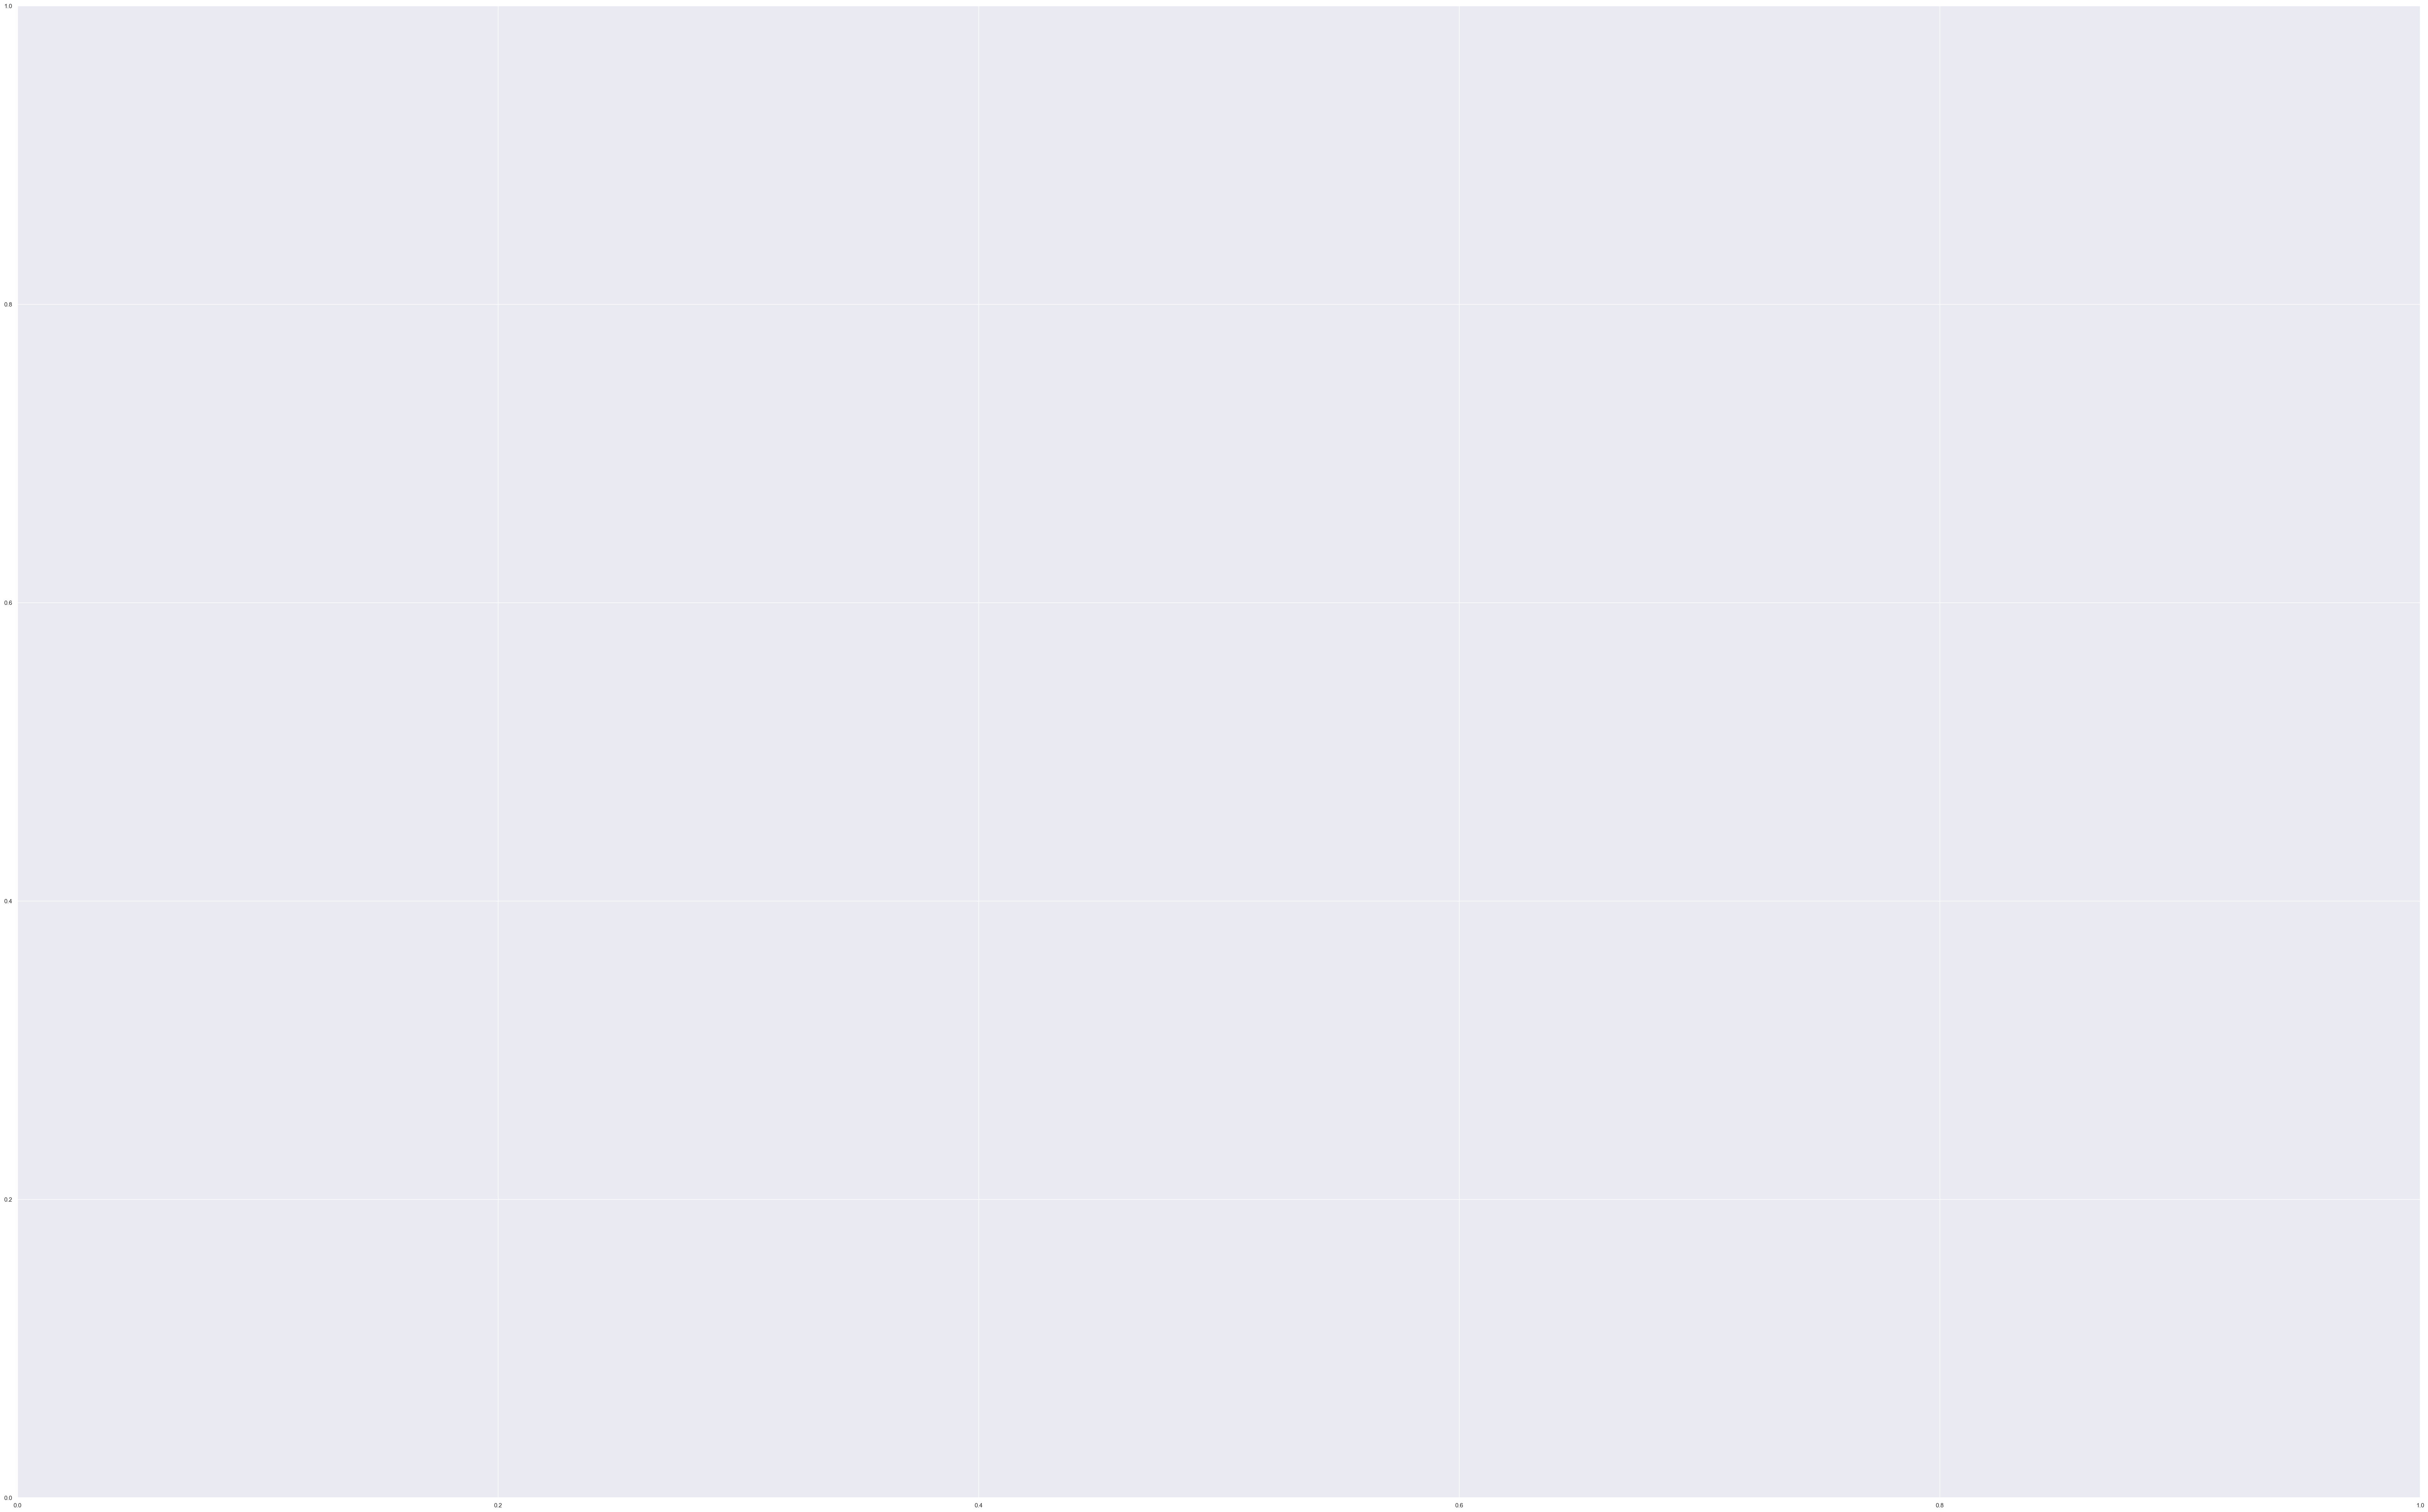

In [13]:
classify(X,Y) 


>>
Akurasi yang dicapai adalah 66,43%.


### Applying moving average to each feature

Selanjutnya, kita akan menerapkan rata-rata bergerak (moving average) pada data untuk mengatasi masalah nilai-nilai yang terdispersi. Setelah itu, kita akan menjalankan klasifikasi ulang menggunakan algoritma XGBoost.

In [14]:
def moving_average(x, w = 10):
    return np.convolve(x, np.ones(w), 'valid') / w

In [15]:
df_ma = pd.DataFrame(columns = ['Attention','Mediation','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2','Label'])

for i in range(int(df_true.SubjectID.min()), int(df_true.SubjectID.max()+1)):
  for j in range(int(df_true.VideoID.min()), int(df_true.VideoID.max()+1)):
    for k in range(0,2):
      if len(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Attention) > 0 :
        attention = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Attention)
        mediation = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Mediation)
        delta = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Delta)
        theta = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Theta)
        alpha1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Alpha1)
        alpha2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Alpha2)
        beta1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Beta1)
        beta2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Beta2)
        gamma1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Gamma1)
        gamma2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Gamma2)
        if k == 1:
          label = np.ones(len(attention))
        else:
          label = np.zeros(len(attention))
        timepoint = np.arange(len(attention))
        array = np.stack((timepoint, attention, mediation, delta, theta, alpha1, alpha2, beta1, beta2, gamma1, gamma2, label))
        array = np.transpose(array)
        df_temp = pd.DataFrame(array, columns = ['timepoint','Attention','Mediation','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2','Label'])
        df_ma = pd.concat([df_ma, df_temp])

print(df_ma)

     Attention  Mediation     Delta     Theta   Alpha1   Alpha2    Beta1  \
0         45.1       57.0  731480.0  153380.0  59790.0  38084.9  22873.0   
1         44.3       56.5  776980.0  162920.0  56744.0  36068.9  21973.0   
2         44.7       57.8  836400.0  174310.0  64110.0  37464.9  26288.0   
3         44.7       56.4  777100.0  140120.0  44226.0  31880.9  23385.0   
4         44.8       53.7  649900.0  135650.0  38330.0  34040.9  24405.0   
..         ...        ...       ...       ...      ...      ...      ...   
110       59.7       52.9  695550.0  134314.0  24167.2  19738.1  20742.0   
111       59.4       52.6  727550.0  147114.0  47167.2  23998.1  27732.0   
112       56.8       51.9  646950.0  141104.0  45739.2  23281.1  23617.0   
113       55.9       51.9  789650.0  159514.0  47632.2  23111.1  25654.0   
114       54.1       52.1  788890.0  161734.0  47598.2  23162.0  25693.0   

       Beta2   Gamma1   Gamma2  Label  timepoint  
0    54908.0  39686.0  25815.0    0.

In [16]:
X_ma = df_ma[['Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']]

print(X.isna().sum())
print(X.shape)
Y_ma = df_ma.Label
print(Y.shape)

Delta     0
Theta     0
Alpha1    0
Alpha2    0
Beta1     0
Beta2     0
Gamma1    0
Gamma2    0
dtype: int64
(6253, 8)
(6253,)


Accuracy: 88.31%


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

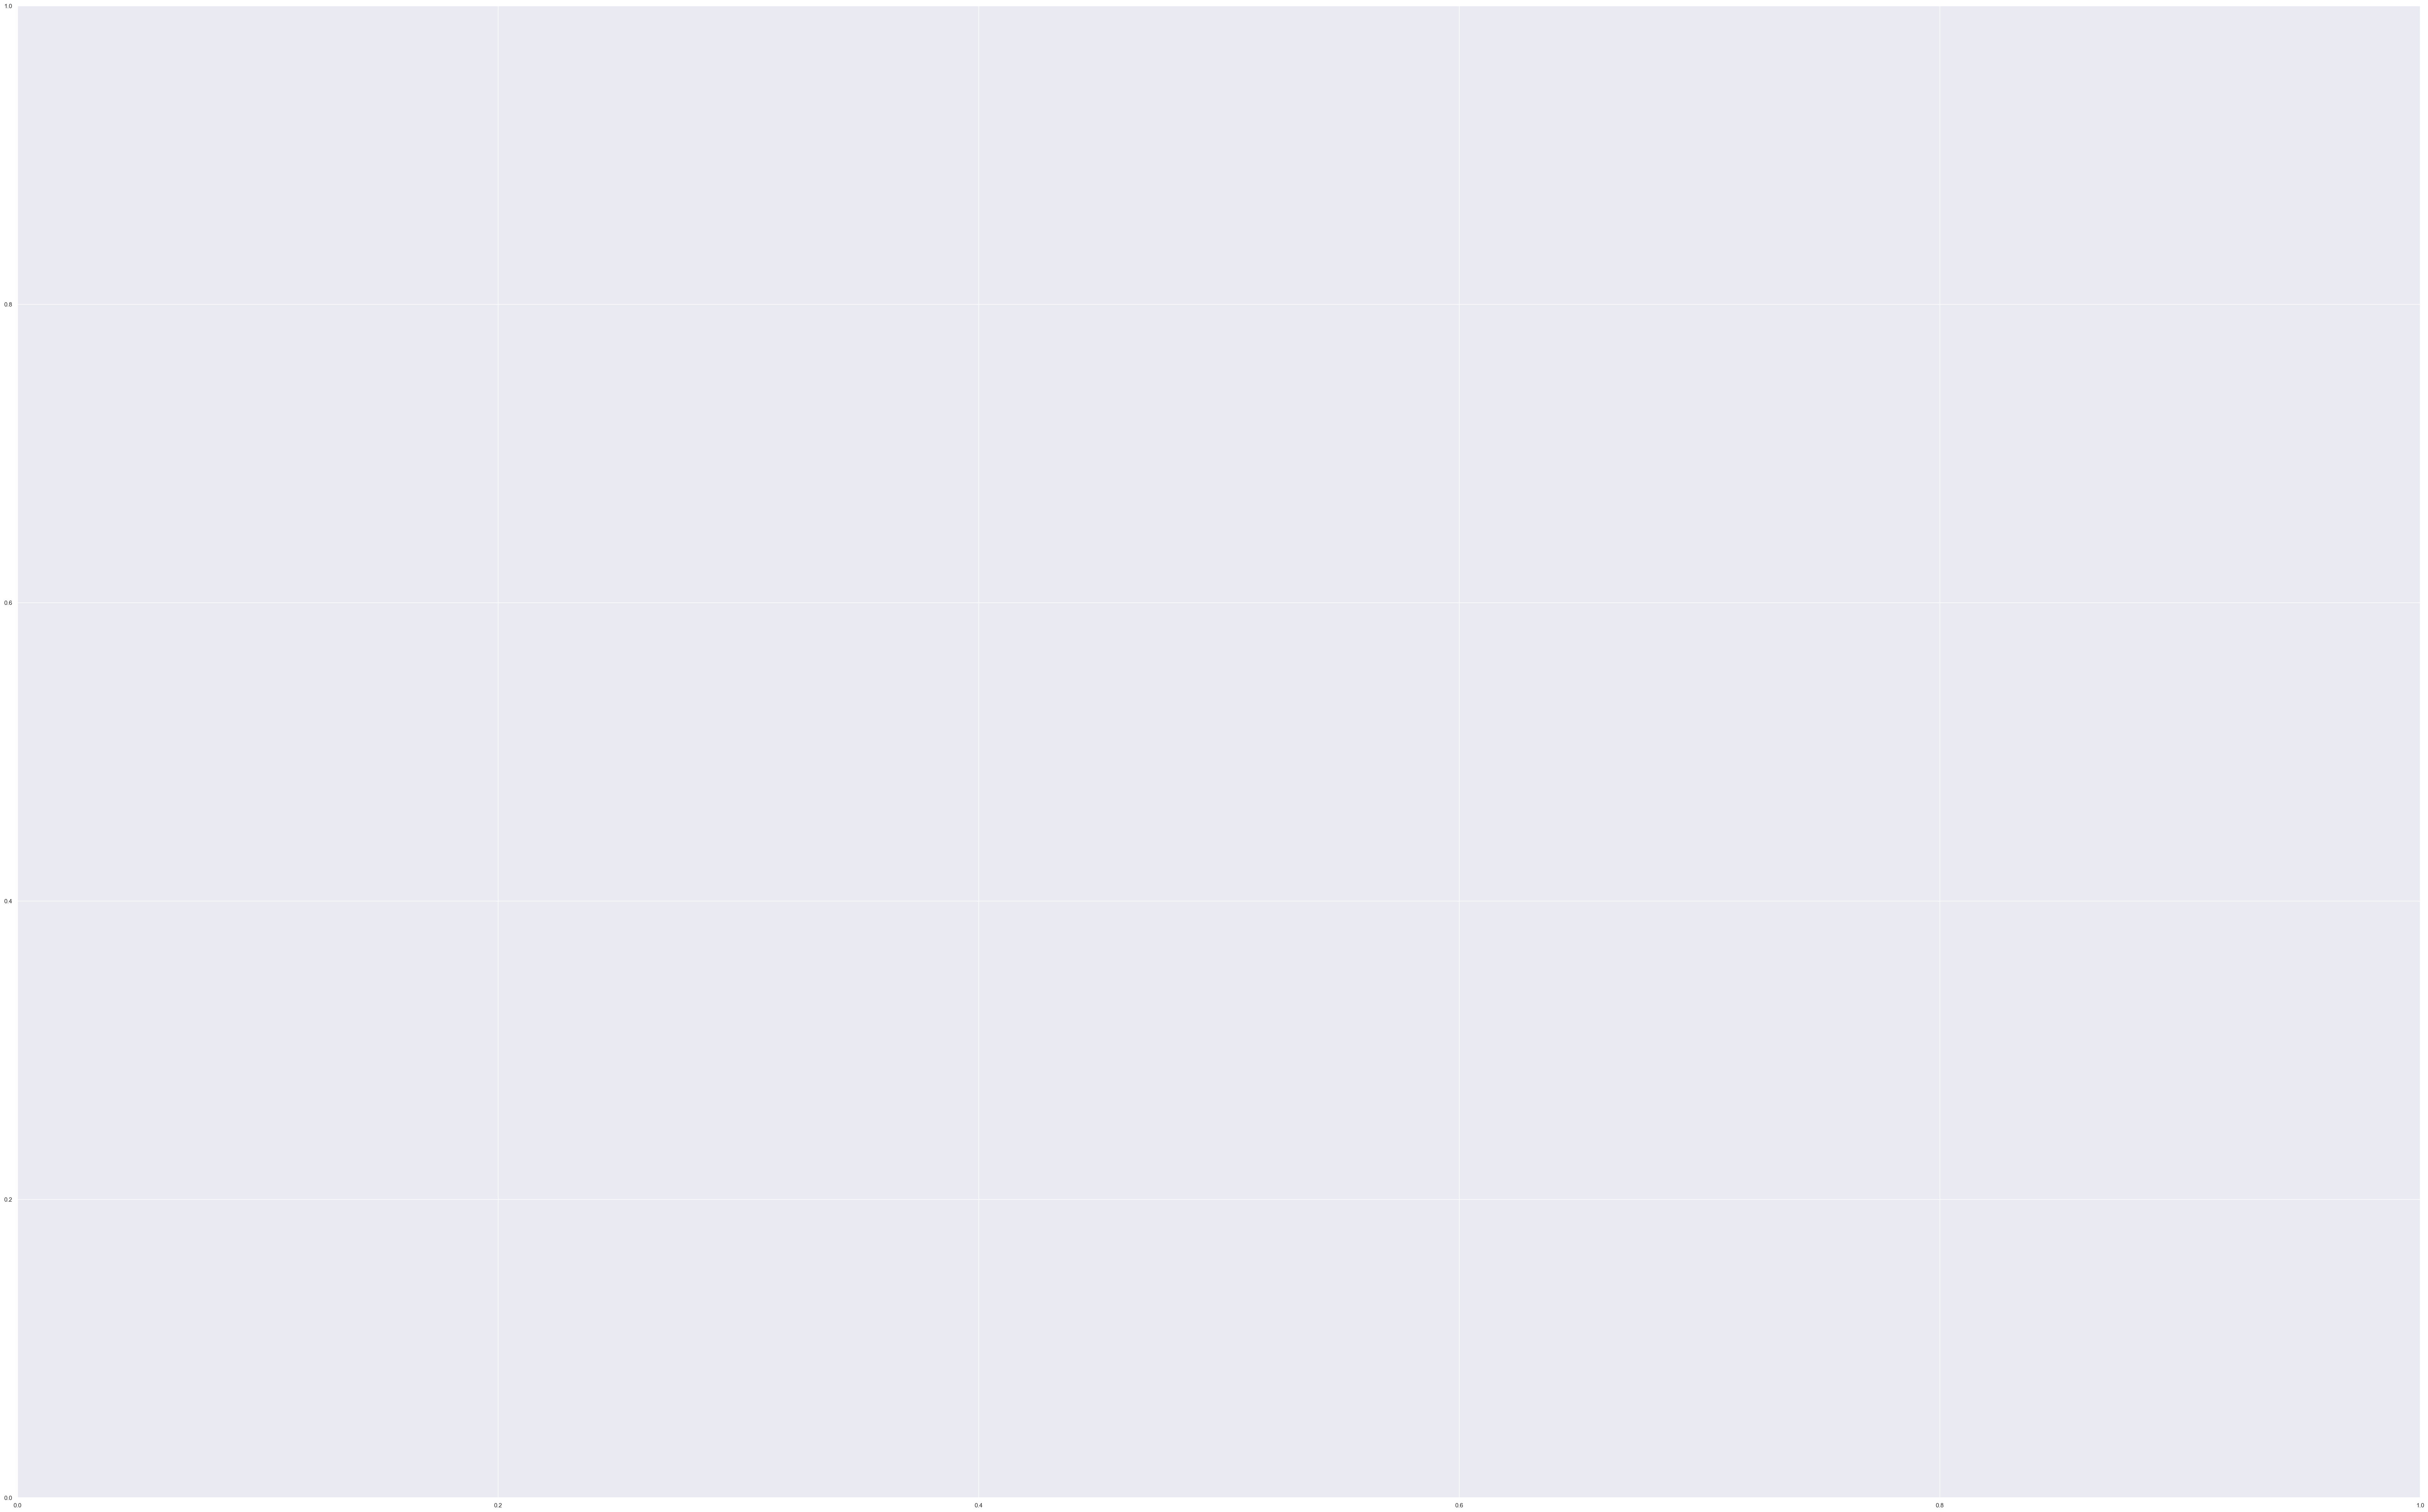

In [17]:
classify(X_ma,Y_ma)


The application of moving average has resulted in an improved accuracy score of 88.31%.

In addition, we have observed changes in the order of important features. The top four features are now Beta2, Gamma2, Delta, and Gamma 1, respectively.
>>
Selain itu, kami juga telah mengamati perubahan dalam urutan fitur yang penting. Empat fitur teratas sekarang adalah Beta2, Gamma2, Delta, dan Gamma1, secara berurutan.


Perubahan dalam urutan fitur yang penting juga menunjukkan bagaimana pentingnya pemrosesan data dan teknik yang digunakan untuk meningkatkan performa model klasifikasi. Fitur-fitur yang dianggap penting berdasarkan analisis mungkin berubah setelah penerapan rata-rata bergerak, dan pemahaman lebih lanjut tentang peran setiap fitur dalam prediksi dapat membantu mengoptimalkan model lebih lanjut.

Perlu dilakukan analisis lebih lanjut untuk memahami penyebab peningkatan akurasi dan perubahan urutan fitur yang penting tersebut, serta melakukan peningkatan lebih lanjut pada model untuk mencapai skor validasi silang yang lebih baik.

## Classification using Bidirectional LSTM






In [18]:
from sklearn.preprocessing import StandardScaler

X_ma = df_ma[['Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']]

x_lstm = StandardScaler().fit_transform(X_ma)
y_lstm = Y_ma

x_train,x_test,y_train,y_test = train_test_split(x_lstm, y_lstm,test_size=0.2, random_state=42, stratify=y_lstm)


n_features = X_ma.shape[1]
x_train = np.array(x_train).reshape(-1,n_features,1)
x_test = np.array(x_test).reshape(-1,n_features,1)

x_train.shape, x_test.shape,y_train.shape,y_test.shape


((4649, 8, 1), (1163, 8, 1), (4649,), (1163,))

In [19]:
inputs = tf.keras.Input(shape=(n_features,1))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = Dropout(0.3)(lstm_1)
lstm_3=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_3)

flat = Flatten()(drop2)

Dense_2 = Dense(128, activation = 'relu')(flat)
outputs = Dense(1, activation='sigmoid')(Dense_2)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 1)]            0         
                                                                 
 dense (Dense)               (None, 8, 64)             128       
                                                                 
 bidirectional (Bidirection  (None, 8, 512)            657408    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 512)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 8, 256)            656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 8, 256)            0     

37/37 [==============================] - 3s 72ms/step
[0.5  0.5  0.49 ... 0.5  0.5  0.5 ]
[0 1 0 ... 1 1 0]


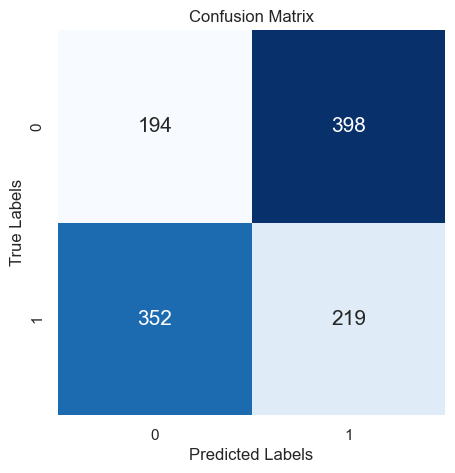

mean squared error :  0.6448839208942391
root mean squared error :  0.803046649264063
mean absolute error :  0.6448839208942391


In [23]:
from sklearn.metrics import confusion_matrix

p_pred = model.predict(x_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 15})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
print("mean squared error : ", mse)

rmse = np.sqrt(mse)
print("root mean squared error : ", rmse)

mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error : ", mae)


>>
Selanjutnya, kami akan melakukan validasi hasil sekali lagi menggunakan cross-validation.






>>
Untuk memahami mengapa peningkatan ini terjadi, kita akan menggambarkan data rata-rata bergerak dan membandingkannya dengan data asli. Selain itu, kita akan membuat heatmap korelasi untuk mengamati apakah terdapat perbaikan dalam korelasi antara setiap fitur.

kesimpulan disini:
>>
nah dari sini bisa kelihatan efek dari moving averages tuh gimana, kek mempengaruhi hasil akhir dalam prediksi atau klasifikasi


Original data


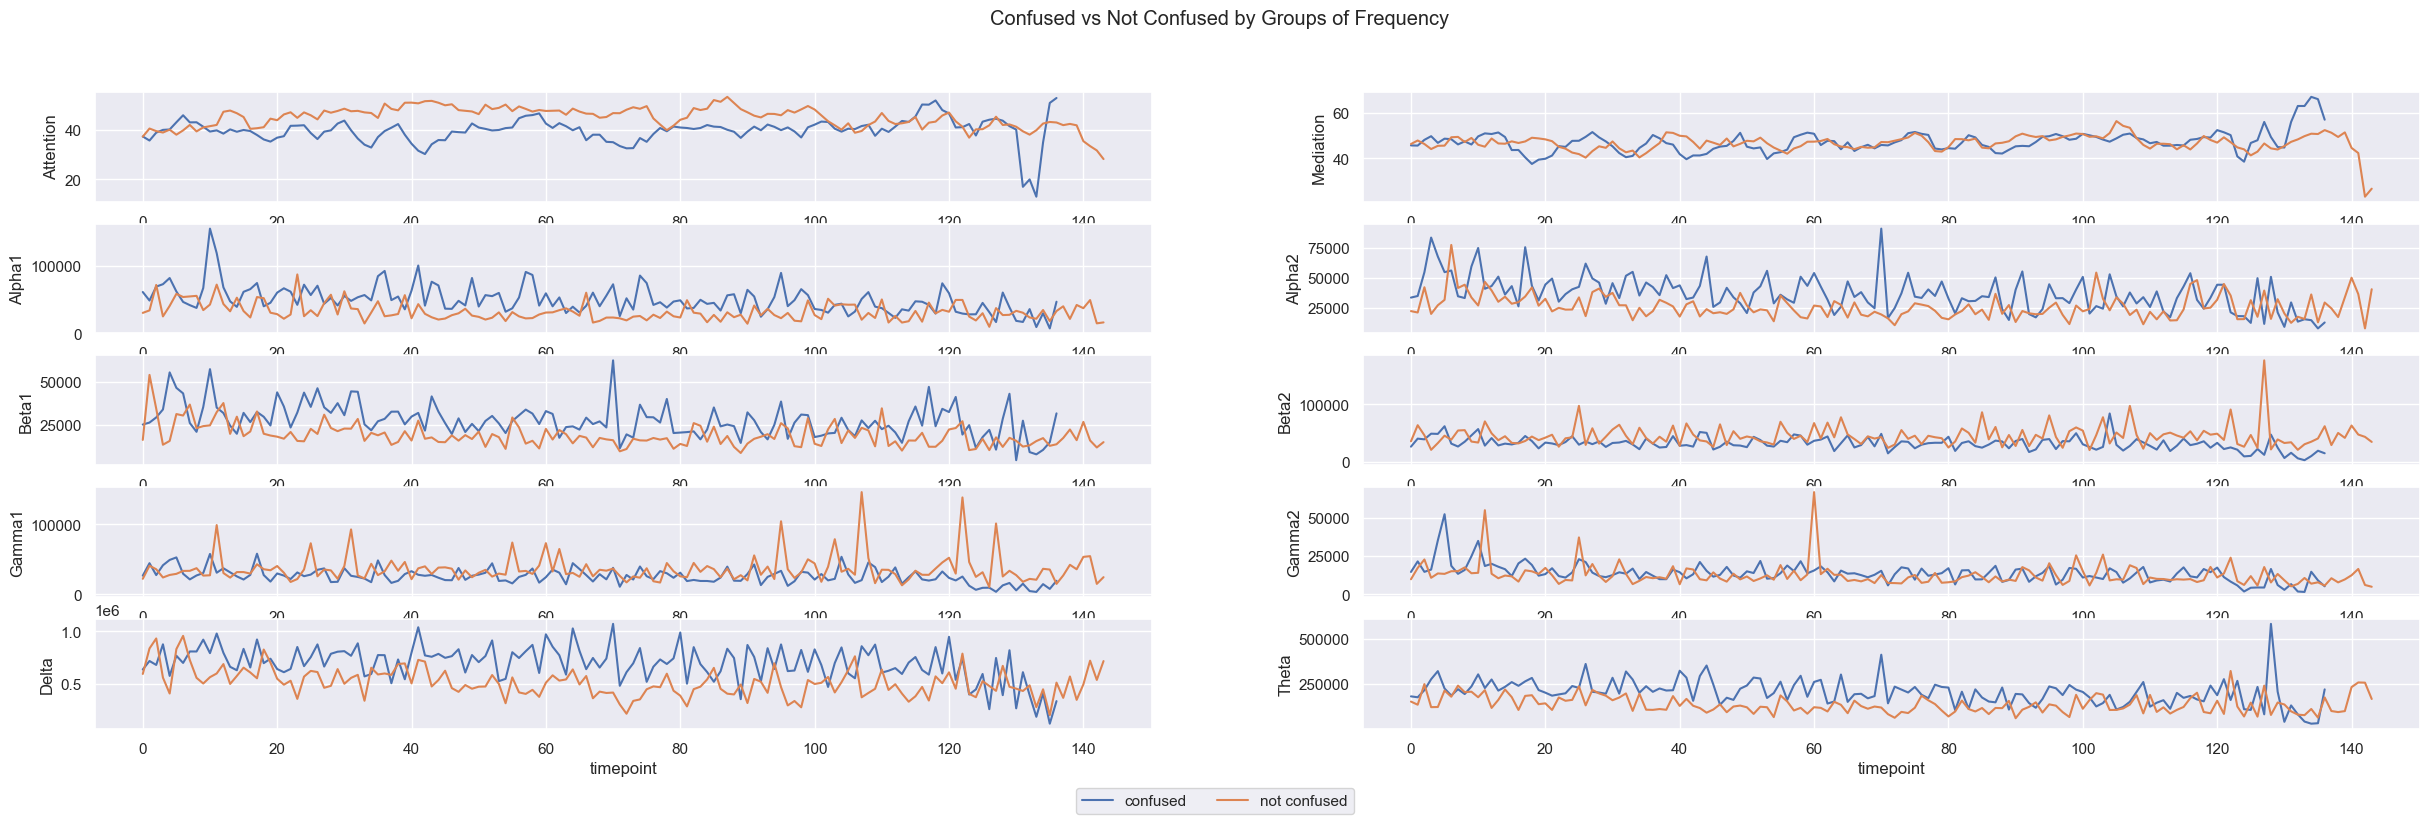

Data after applying moving average


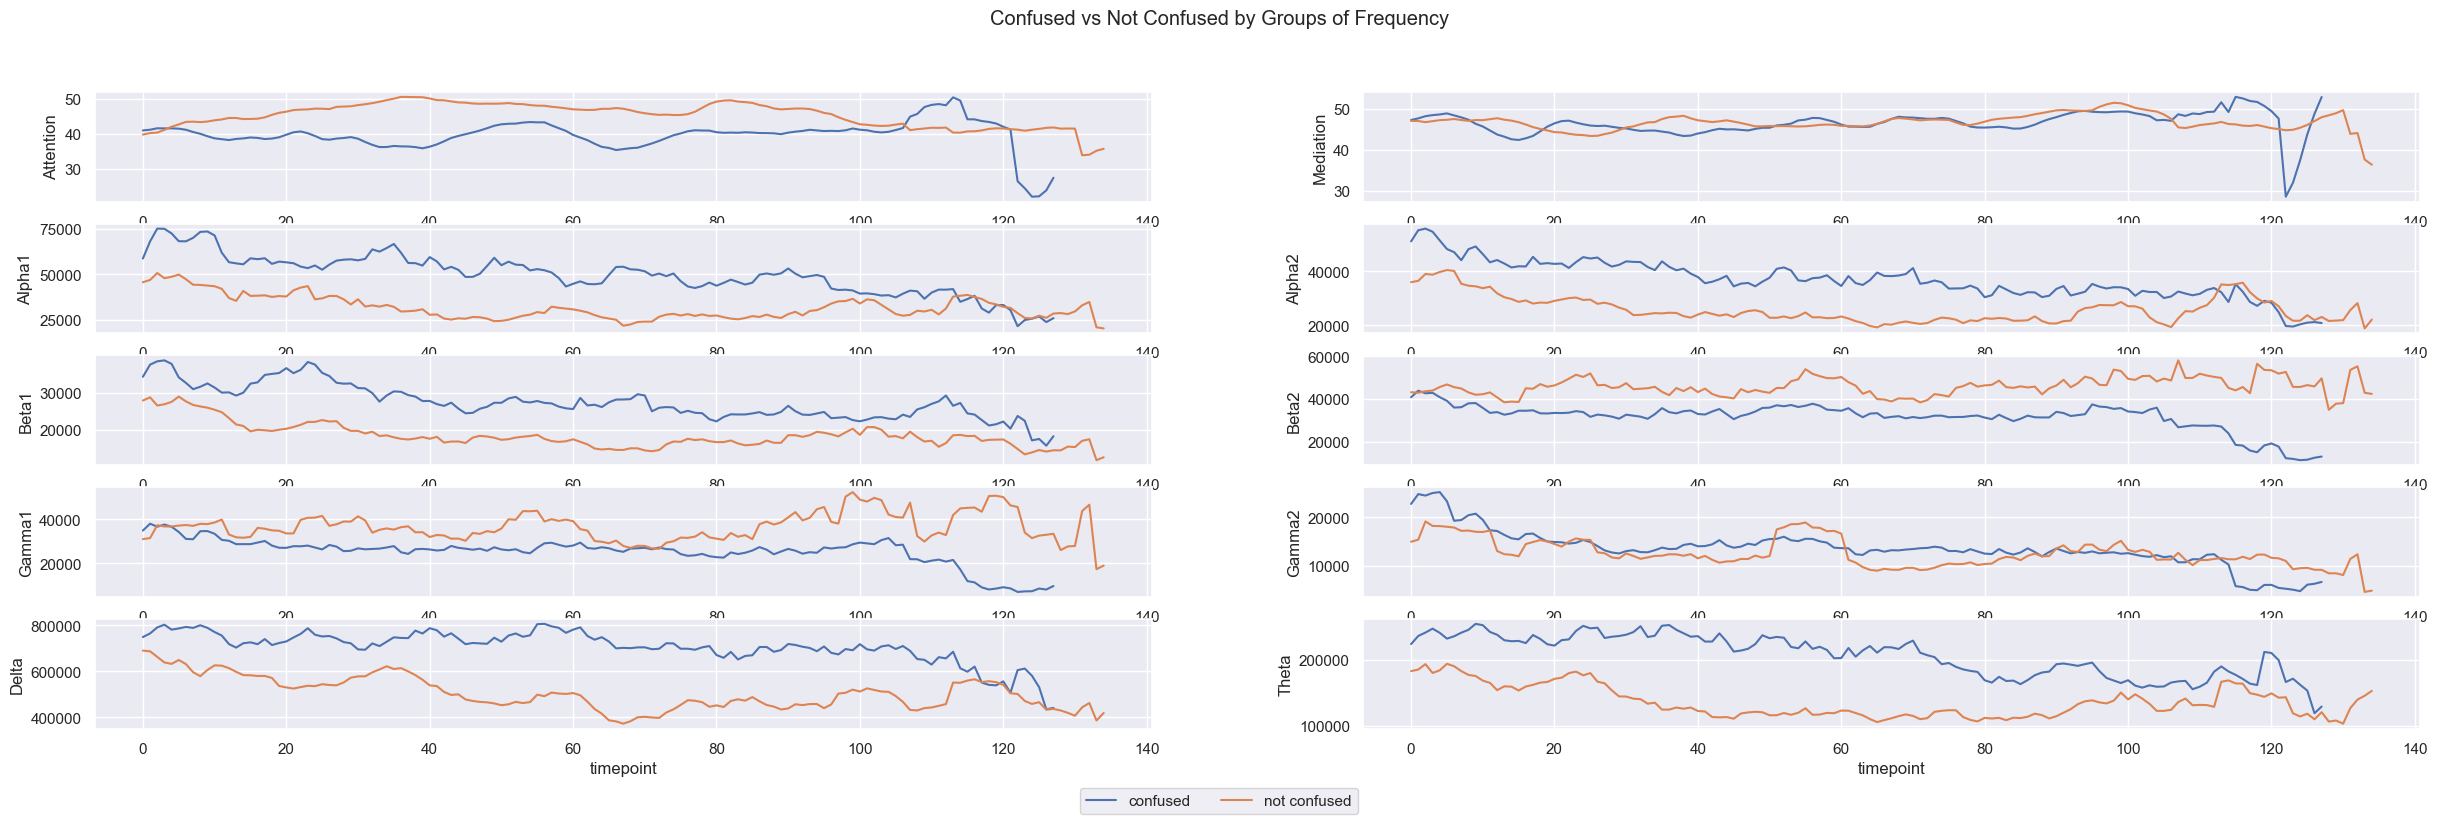

In [26]:
query = "predefinedlabel == 1 & userlabel == 1"
df_confused = df_new.query(query)

query = "predefinedlabel == 0 & userlabel == 0"
df_understand = df_new.query(query)

print("===================================")
print("Original data")
print("===================================")
draw_multiple_figures(df_confused,df_understand)

query = "Label == 1"
df_confused = df_ma.query(query)

query = "Label == 0"
df_understand = df_ma.query(query)

print("===================================")
print("Data after applying moving average")
print("===================================")
draw_multiple_figures(df_confused,df_understand)


>>
Seperti yang terlihat dari grafik di atas, garis-garis pada data rata-rata bergerak (moving average) lebih mudah dibedakan antara setiap label dibandingkan dengan data asli. Oleh karena itu, hal ini telah berkontribusi dalam meningkatkan kemampuan klasifikasi.

<Axes: >

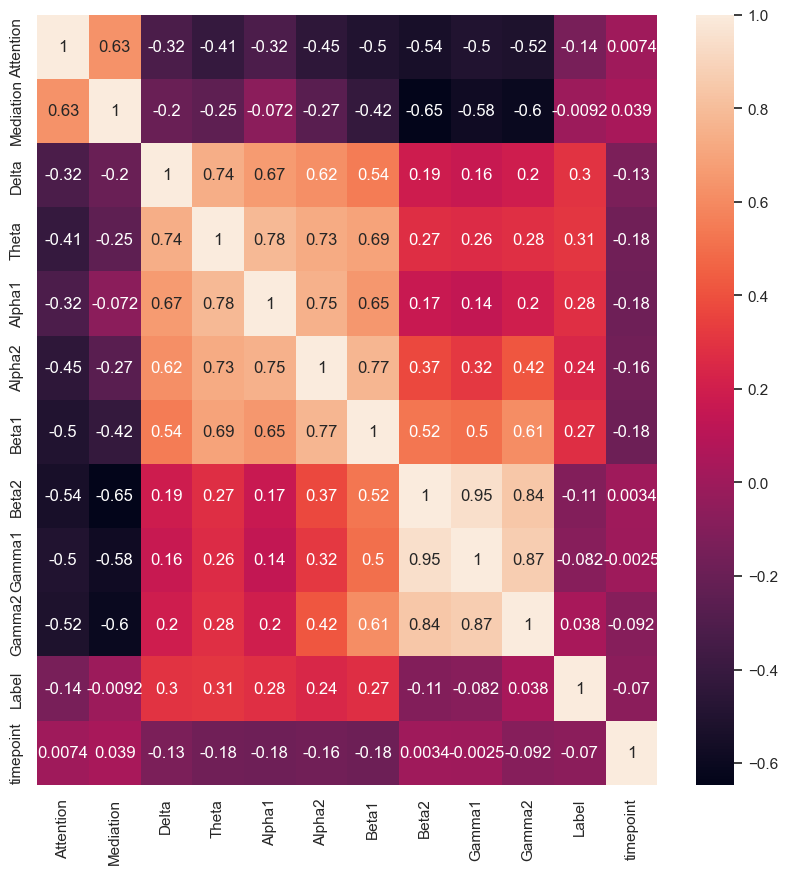

In [27]:
plt.figure(figsize = (10,10))
cor_matrix = df_ma.corr()
sns.heatmap(cor_matrix,annot=True)

Selain itu, peta panas korelasi dari data rata-rata bergerak (moving average) menunjukkan peningkatan dalam skor korelasi dibandingkan dengan data asli.